In [1]:
using Pkg;
Pkg.activate("./julia_temp_criticality/")

  Activating project at `~/Projects/Postdoc/nature_temp_paper/temporal_criticality/julia_temp_criticality`


# Temporal criticality

The goal of this notebook is to show how to use some of the functions in the `julia_temp_criticality` package used to reproduce the "Temporal Criticality" paper. 

## Equations

We are trying to simulate the equation

$$
\tau_{i,t} = \max_{j \in \mathcal{N}_i} \left( \tau_{j,t-1} - B \right) + \varepsilon_{i,t}.
$$


We know that, setting $\tau_{i,0}=0,\quad \forall i$ we will have $\mathbb{E}[\tau_{i,t}] = Vt$ with $V=(B_c-B)^+$, where $B_c$ is determined by simulation for finite $N$.

## Simulations

All of the required code is in the `julia_temp_criticality` package. We will run a short simulation to show that we do indeed have $V=(B_c-B)^+$.  We will run our simulation with $N=10 000$ nodes with each $k=7$ neighbours (this means that $\mathcal{N}_i$ is a set of $7$ randomly chosen nodes at each time point). We will run the simulation for $T=10000$ time steps, sweeping over values of $B$ ranging from $2.5$ to $4$. 

As we will see, this will give a value of $B_c$ close to $4$. 

We will run this using a parallel implementation of the algorithm, using $4$ threads (this can be augmented). 

In [2]:
# this code will run on a personal computer, assuming you have 4 cores available for computations.
# if you have more cores, you can change the number of workers below to increase the parallel performance, and then you can also increase
# the values of n and T to get better statistics

using Distributed;
# add 4 workers for better parallel performance
addprocs(4);

@everywhere using julia_temp_criticality;


function run_simulation(n, k, T, Bs)
    results = pmap(B->order_parameter_lstsq(meanfield_simulation(n, k, T, B)), Bs)
    return results
end


run_simulation (generic function with 1 method)

We first reproduce a crude version of the order parameter plot. A more refined version can be given by running with more datapoints in e.g. a cluster.

In [3]:
Bs = 2.5:0.05:4.5
k = 7
n = 10_000
T = 1000 

simulations = run_simulation(n, k, T, Bs);

In [4]:
# import the plotting package 
using Plots

In [6]:
# we approximate Bc as 4 for simplicity

pseudo_theory = [positive_part.(4-B) for B in Bs];

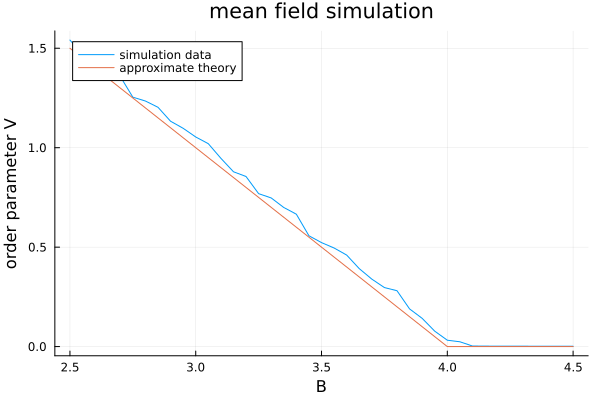

In [7]:
plot(Bs, simulations, label="simulation data", xlabel="B", ylabel="order parameter V", title="mean field simulation", legend=:topleft)
plot!(Bs, pseudo_theory, label="approximate theory")